In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree, export_text

# Regression

## Data Preparation
- prepare your data for the regression task (univariate and multivariate)
- decide a continuous variable to predict
- remove all the variable that are not necessary or "leak" information about your target.
- divide the dataset in train/test
- for each classifier perform the correct preprocessing.

In [2]:
df = pd.read_csv('versionepulitamed.csv', skipinitialspace=True)

In [3]:
df.head()

,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,outcome_datetime,breed,color,found_location,intake_condition,intake_type,...,drooling2,coat_length2,good_with_strangers2,protectiveness2,trainability2,energy2,barking2,breed_avg_weight2,breed_avg_height2,weight_height_ratio
0,2017-03-08,Foster,Adoption,Intact Male,2017-05-09 07:48:00,Greyhound Mix,Tan,6016 Los Cielos in Travis (TX),Normal,Stray,...,0.218111,0.396311,2.177002,3.390986,2.873580,4.167703,1.974363,65.0,29.00,2.241379
1,2016-07-03,Foster,Adoption,Spayed Female,2016-09-10 17:22:00,Boxer Mix,Brown/White,11719 Schiber Rd in Mustang Ridge (TX),Normal,Stray,...,3.481632,1.720616,4.839427,3.144705,3.010407,4.231642,2.737943,65.0,24.00,2.708333
2,2010-02-10,Partner,Transfer,Intact Male,2018-03-01 16:27:00,Chihuahua Shorthair Mix,Red,2300 Scarborough in Austin (TX),Normal,Stray,...,1.046249,1.507057,2.740278,3.620172,1.832087,2.834511,5.015286,5.0,6.50,0.769231
3,2006-10-22,Partner,Transfer,Neutered Male,2015-10-28 14:12:00,Pomeranian Mix,White/Black,9415 Rowlands Sayle Rd in Austin (TX),Normal,Stray,...,0.475766,1.696648,2.523325,3.770284,3.482516,2.037904,3.420557,5.0,6.50,0.769231
4,2016-09-07,Partner,Transfer,Spayed Female,2017-09-16 16:01:00,Shih Tzu Mix,White/Brown,3909 N Interstate 35 Service Rd in Austin (TX),Normal,Stray,...,0.360951,0.162845,3.372774,2.924166,4.698562,2.944130,2.754888,12.5,9.75,1.282051


In [4]:
df.columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime', 'breed_category', 'Apricot', 'Black',
       'Black Brindle', 'Black Smoke', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tiger', 'Buff', 'Chocolate', 'Cream', 'Fawn', 'Gold', 'Gray',
       'Liver', 'Liver Tick', 'Orange', 'Red', 'Red Merle', 'Red Tick',
       'Sable', 'Silver', 'Tan', 'Tortie', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle', 'Mixed_breed', 'breed_min_life_expectancy2',
       'breed_max_life_expectancy2', 'dog_age', 'length_of_stay',
       'playfulness2', 'similar_breed', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainabi

Prima di testare i modelli rimuovo le feature rindondanti e altamente correlate

<Axes: >

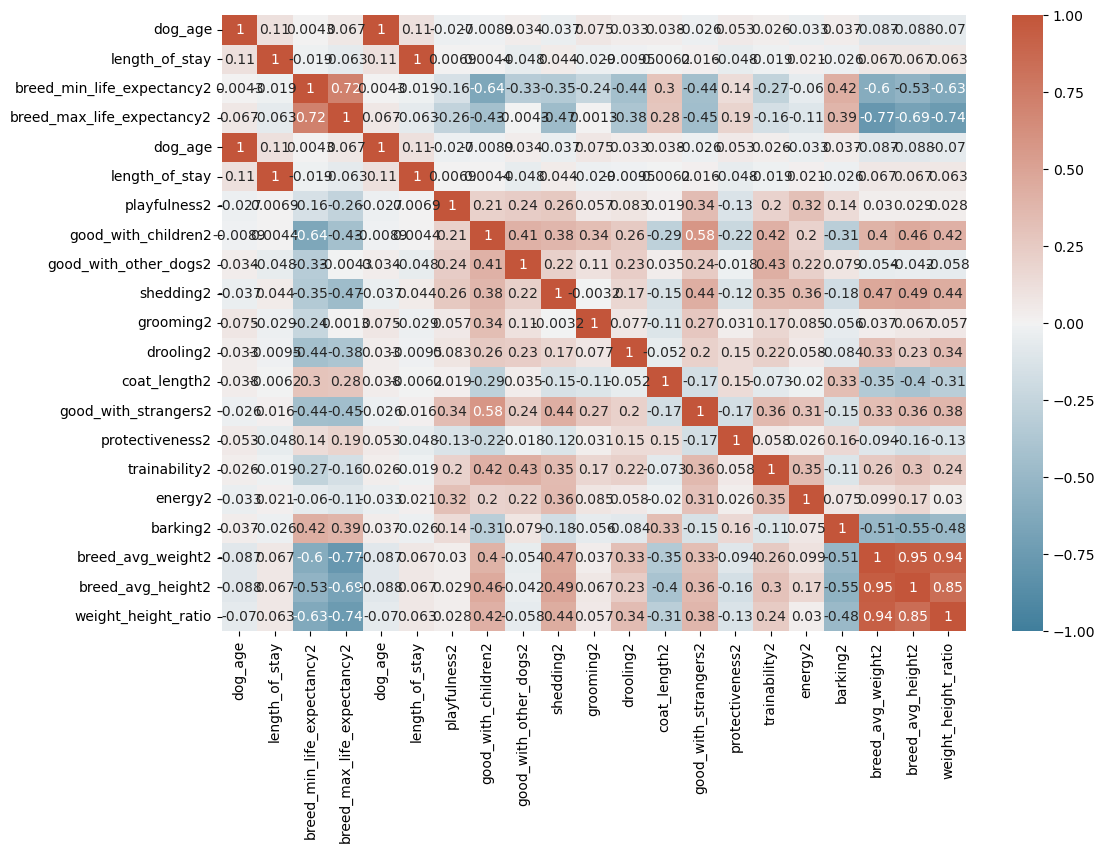

In [5]:
corr = df[[
           'dog_age',
       'length_of_stay',
        'breed_min_life_expectancy2',
       'breed_max_life_expectancy2', 'dog_age', 'length_of_stay',
       'playfulness2',  'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_avg_weight2',
       'breed_avg_height2','weight_height_ratio', ]].corr()
plt.figure(figsize=(12, 8)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True)

In [6]:
df['breed_life_expectancy'] = (df[ 'breed_min_life_expectancy2'] + df['breed_max_life_expectancy2']) / 2
df = df.drop(columns=['breed_min_life_expectancy2', 'breed_max_life_expectancy2'])

In [7]:
df['log_weight_height_ratio']= np.log1p(df['weight_height_ratio'])

<Axes: >

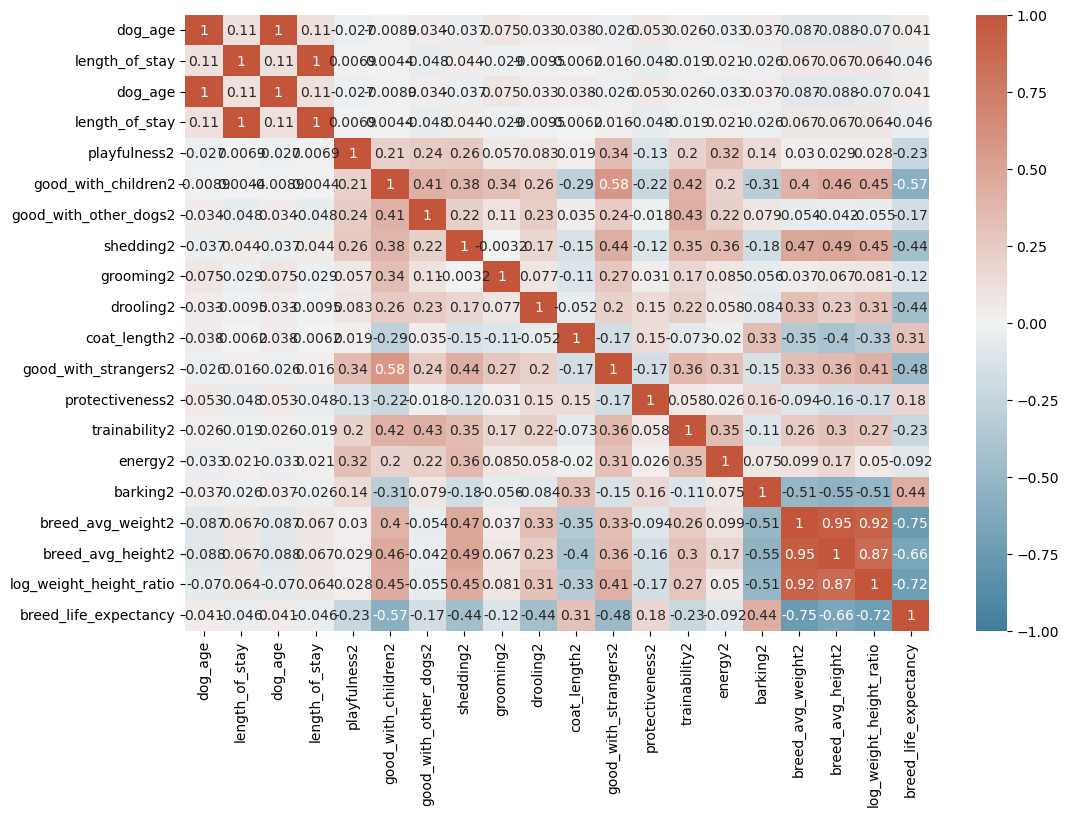

In [8]:
corr = df[[
           'dog_age',
       'length_of_stay','dog_age', 'length_of_stay',
       'playfulness2',  'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_avg_weight2',
       'breed_avg_height2','log_weight_height_ratio', 'breed_life_expectancy']].corr()
plt.figure(figsize=(12, 8)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True)

In [9]:
col_drop=['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime', 'breed_category', 'Apricot', 'Black',
       'Black Brindle', 'Black Smoke', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tiger', 'Buff', 'Chocolate', 'Cream', 'Fawn', 'Gold', 'Gray',
       'Liver', 'Liver Tick', 'Orange', 'Red', 'Red Merle', 'Red Tick',
       'Sable', 'Silver', 'Tan', 'Tortie', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle', 'Mixed_breed','similar_breed', 'breed_avg_weight2',
       'breed_avg_height2', 'weight_height_ratio']
df2=df.drop(columns=col_drop)

I modelli che sto per addestrare e valutare hanno lo scopo di indagare la relazione tra le caratteristiche comportamentali del cane, l'età  e il tempo di permanenza nel rifiugio considerato come variabile dipendente da spiegare e prevedere con una o più variabili indipendenti a seconda del tipo di analisi



In [10]:
print(df.isnull().sum())

date_of_birth              0
outcome_subtype            0
outcome_type               0
sex_upon_outcome           0
outcome_datetime           0
                          ..
breed_avg_weight2          0
breed_avg_height2          0
weight_height_ratio        0
breed_life_expectancy      0
log_weight_height_ratio    0
Length: 68, dtype: int64


In [11]:
df2

,dog_age,length_of_stay,playfulness2,good_with_children2,good_with_other_dogs2,shedding2,grooming2,drooling2,coat_length2,good_with_strangers2,protectiveness2,trainability2,energy2,barking2,breed_life_expectancy,log_weight_height_ratio
0,0.170753,0.083801,3.191688,2.625100,3.615374,3.506990,0.365627,0.218111,0.396311,2.177002,3.390986,2.873580,4.167703,1.974363,11.5,1.175999
1,0.191024,0.088318,3.916796,5.835203,2.925542,1.663397,2.324304,3.481632,1.720616,4.839427,3.144705,3.010407,4.231642,2.737943,11.0,1.310583
2,8.059412,0.014233,3.577027,2.544920,4.314612,3.359707,0.217080,1.046249,1.507057,2.740278,3.620172,1.832087,2.834511,5.015286,15.0,0.570545
3,9.023539,0.016787,2.203599,2.835409,2.936067,3.165869,2.045838,0.475766,1.696648,2.523325,3.770284,3.482516,2.037904,3.420557,14.0,0.570545
4,1.026486,0.011556,3.094009,4.391545,4.955892,0.172306,3.903627,0.360951,0.162845,3.372774,2.924166,4.698562,2.944130,2.754888,14.0,0.825075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,0.676098,0.003632,3.965774,3.244186,3.149937,2.785764,1.804318,1.302827,1.157518,3.539462,3.492189,3.672274,4.069702,3.274014,13.0,1.269238
4483,0.585717,0.002886,4.362945,2.520976,0.758867,2.118580,2.332269,1.217937,0.490648,2.051769,3.744065,2.582030,4.313444,2.962705,12.5,1.332550
4484,1.012962,0.011134,4.277275,3.698835,3.038219,1.859250,1.703815,0.997735,1.617410,3.406384,2.927087,3.864698,4.182412,1.842600,13.0,1.269238
4485,10.295152,0.027983,3.854234,3.339536,0.892357,3.459405,2.035821,0.632689,0.389339,3.176811,3.074202,2.674413,4.363280,2.471878,12.5,1.332550


In [12]:
df2.columns

Index(['dog_age', 'length_of_stay', 'playfulness2', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_life_expectancy',
       'log_weight_height_ratio'],
      dtype='object')

In [13]:
columns_X = ['dog_age', 
       'playfulness2', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2','log_weight_height_ratio','breed_life_expectancy']


In [14]:
X = df2[columns_X].values  


In [15]:
y = df2['length_of_stay'].values 

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [18]:
print('Train set: {}, Test set: {}'.format(X_train.shape,X_test.shape))


Train set: (3140, 15), Test set: (1347, 15)


## Dummy
It's always a good idea to understand how well a naive model performs. You can use the DummyRegressor for that. If your next model do worse than naive... well, you may have a problem!

In [19]:
from sklearn.dummy import DummyRegressor

In [20]:
reg = DummyRegressor(strategy="mean")
reg.fit(X_train, y_train)
y_pred_dummy = reg.predict(X_test)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mse_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)
print('Mean Absolute Error (MAE):', round(mae_dummy, 2))
print('Mean Squared Error (MSE):', round(mse_dummy, 2))
print('Root Mean Squared Error (RMSE):', round(rmse_dummy, 2))
print('R² Score:', round(r2_dummy, 4))

Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.19
R² Score: -0.0047


## Univariate
- Use univariate linear regression to predict the target variable.
- Evaluate the performance of the regressor using metrics and/or plots.

In [21]:
X_uni = df2[['dog_age']].values 
y_uni = df2['length_of_stay'].values


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_uni, y_uni, test_size=0.3, random_state=0)


In [23]:
print('Train set: {}, Test set: {}'.format(X_train.shape,X_test.shape))

Train set: (3140, 1), Test set: (1347, 1)


In [24]:
reg_uni = LinearRegression()
reg_uni.fit(X_train, y_train)


LinearRegression()

In [25]:
y_pred_uni = reg_uni.predict(X_test)


In [26]:
mae_uni = mean_absolute_error(y_test, y_pred_uni)
mse_uni = mean_squared_error(y_test, y_pred_uni)
rmse_uni = np.sqrt(mse_uni)
r2_uni = r2_score(y_test, y_pred_uni)

print('Mean Absolute Error (MAE):', round(mae_uni, 3))
print('Mean Squared Error (MSE):', round(mse_uni, 3))
print('R² Score:', round(r2_uni, 4))


Mean Absolute Error (MAE): 0.077
Mean Squared Error (MSE): 0.035
R² Score: 0.0107


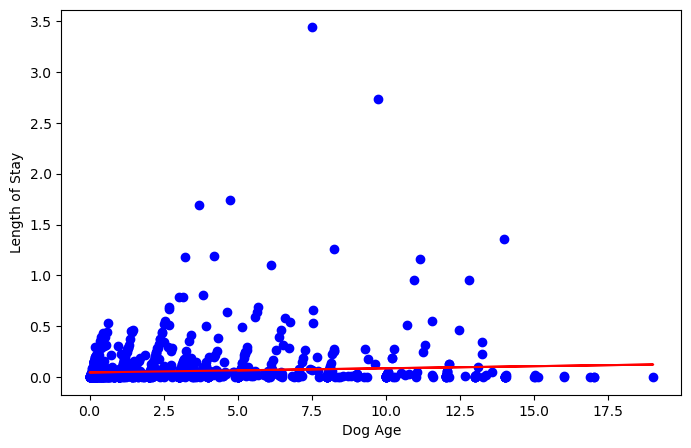

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_uni, color='red')
plt.xlabel('Dog Age')
plt.ylabel('Length of Stay')
plt.show()


In [28]:
reg_uni.coef_

array([0.00408717])

In [29]:
reg_uni.intercept_

0.04698652511204693

Il modello  con x = dog_age spiega solo 1.07 % della varianza di y=lenght_of_stay.

Come si evince dal grafico la retta di regressione ha una pendenza quasi pari a 0.

In [30]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [31]:
ridge.coef_

array([0.00408705])

In [32]:
y_pred = ridge.predict(X_test)

print('MSE %s' % mean_squared_error(y_test, y_pred))
print('MAE %s' % mean_absolute_error(y_test, y_pred))
print('R2 %s' % r2_score(y_test, y_pred))

MSE 0.0352633929223563
MAE 0.07694390863801724
R2 0.010709346653493323


La correzione con Ridge non genera un modello che si discosta dal precedente

In [33]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [34]:
lasso.coef_

array([0.])

In [35]:
y_pred = lasso.predict(X_test)

print('MSE %s' % mean_squared_error(y_test, y_pred))
print('MAE %s' % mean_absolute_error(y_test, y_pred))
print('R2 %s' % r2_score(y_test, y_pred))

MSE 0.03581439586980403
MAE 0.07658098502830356
R2 -0.004748668605464745


Lasso è il modello peggiore tra i tre a parità di MSE e MAE,presenta il peggior punteggio di R2

Nal dataframe originale dog_age e lenght_of_stay hanno una distribuzione asimmetrica, prima di testare un nuovo modello 
ho applicato una trasformazione logaritmica per vedere se il modello di regressione univariata  migliora 

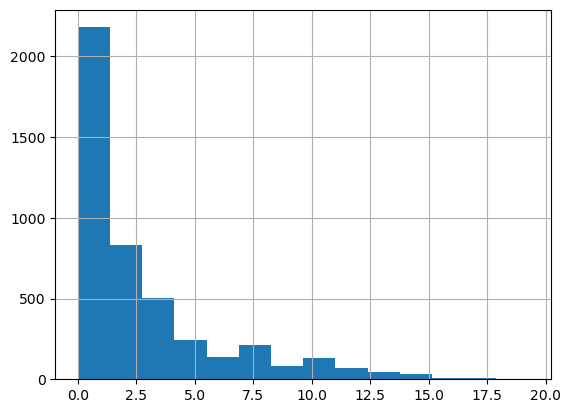

In [36]:
k = int(np.ceil(np.log2(len(df)) + 1))
df['dog_age'].hist(bins=k)
plt.show()    

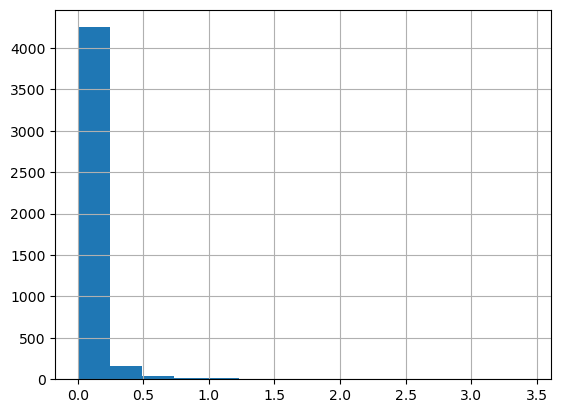

In [37]:
k = int(np.ceil(np.log2(len(df)) + 1))
df['length_of_stay'].hist(bins=k)
plt.show()  

In [38]:
df["log_length_of_stay"] = np.log1p(df["length_of_stay"])
df["log_dog_age"] = np.log1p(df["dog_age"])


In [39]:

X_l = df[["log_dog_age"]].values
y_l = df["log_length_of_stay"].values





In [40]:
scaler_log = StandardScaler()
X_scaled_log = scaler.fit_transform(X_l)

In [41]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_l, y_l, test_size=0.3, random_state=0)



In [42]:

reg_log = LinearRegression()
reg_log.fit(X_train_log, y_train_log)


y_pred_log = reg_log.predict(X_test_log)

mse_log = mean_squared_error(y_test_log, y_pred_log)
mae_log = mean_absolute_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)


print('MSE:', round(mse_log, 5))
print('MAE:', round(mae_log, 5))
print('R² Score:', round(r2_log, 4))

MSE: 0.01408
MAE: 0.06197
R² Score: 0.0184


In [43]:
reg_log.coef_

array([0.01628366])

In [44]:
reg_log.intercept_

0.034428386382392526

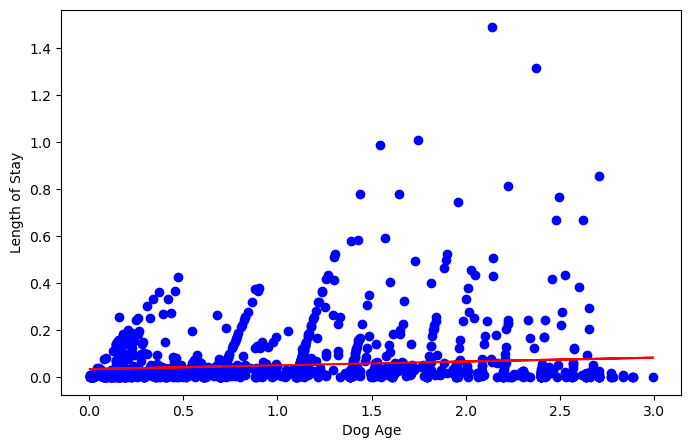

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test_log, y_test_log, color='blue')
plt.plot(X_test_log, y_pred_log, color='red')
plt.xlabel('Dog Age')
plt.ylabel('Length of Stay')
plt.show()

Osservando il grafico e i valori del coefficiente di regressione e dell'intercetta la pendenza non è cambiata di molto, a livello di metriche R2 è leggermente aumentato

In [46]:
ridge_log = Ridge()
ridge_log.fit(X_train_log, y_train_log)




Ridge()

In [47]:
ridge_log.coef_


array([0.0162742])

In [48]:
y_pred_log = ridge_log.predict(X_test_log)

In [49]:
print('MSE %s' % mean_squared_error(y_test_log, y_pred_log))
print('MAE %s' % mean_absolute_error(y_test, y_pred_log))
print('R2 %s' % r2_score(y_test_log, y_pred_log))


MSE 0.014081448037389276
MAE 0.0731262711557934
R2 0.01843833982288723


In [50]:
lasso_log = Lasso()
lasso_log.fit(X_train_log, y_train_log)

Lasso()

In [51]:
lasso_log.coef_

array([0.])

In [52]:
y_pred = lasso_log.predict(X_test_log)

In [53]:
print('MSE %s' % mean_squared_error(y_test_log, y_pred_log))
print('MAE %s' % mean_absolute_error(y_test_log, y_pred_log))
print('R2 %s' % r2_score(y_test_log, y_pred_log))

MSE 0.014081448037389276
MAE 0.06197373062459191
R2 0.01843833982288723


Sia ridge che lasso non  segnano un miglioramento del modello a livello di varianza spiegata

Il modello migliore di questa sezione è la  regressione univariata con su variabili log-trasformate

## Multivariate
- Use multivariate linear regression to predict the target variable.
- Use two other multivariate regressors to predict the target variable.
- Evaluate and compare the performance of the regressors using metrics and/or plots.

Le variabili già processate nella prima sezione che per x sono :

-dog_age

-playfulness2, 

-good_with_children2

-good_with_other_dogs2, 

-shedding2

-grooming2 

-drooling2

-coat_length2 


-good_with_strangers2

-protectiveness2 


-trainability2 

-energy2

-barking2



In [54]:
X_train_m, X_test_m, y_train_m, y_test_m, = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [55]:
linreg_multi = LinearRegression()
linreg_multi.fit(X_train_m, y_train_m)




LinearRegression()

In [56]:
y_pred_multi = linreg_multi.predict(X_test_m)

print("MSE:", mean_squared_error(y_test_m, y_pred_multi))
print("MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("R2 Score:", r2_score(y_test_m, y_pred_multi))

MSE: 0.03495576036486956
MAE: 0.07583258621768833
R2 Score: 0.01933977012002741


In [57]:
ridge_multi = Ridge()
ridge_multi.fit(X_train_m, y_train_m)
y_pred_ridge = ridge_multi.predict(X_test_m)

print('Ridge Regression:')
print('MSE:', mean_squared_error(y_test_m, y_pred_ridge))
print('MAE:', mean_absolute_error(y_test_m, y_pred_ridge))
print('R2 Score:', r2_score(y_test_m, y_pred_ridge))

Ridge Regression:
MSE: 0.03495586935776164
MAE: 0.07583211894400053
R2 Score: 0.01933671239811008


In [58]:
ridge_multi.coef_

array([ 1.50418911e-02, -4.09219174e-03, -1.35729273e-05, -3.55462558e-03,
        2.64990488e-03, -5.50752451e-03, -4.38112950e-03,  3.84265581e-03,
       -3.06604912e-05, -4.78734250e-03, -5.86571592e-03,  3.62850091e-03,
        2.07885520e-03,  1.04807326e-02, -3.87532911e-03])

A livello di metriche non c'è un cambiamento tra il modello con e senza Ridge. 

In [59]:

lasso = Lasso()
lasso.fit(X_train_m, y_train_m)
y_pred_lasso = lasso.predict(X_test_m)

print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test_m, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test_m, y_pred_lasso))
print("R2 Score:", r2_score(y_test_m, y_pred_lasso))


Lasso Regression:
MSE: 0.03581439586980403
MAE: 0.07658098502830356
R2 Score: -0.004748668605464745


In [60]:
lasso.coef_

array([ 0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,
        0., -0.])

La regolarizzazione con lasso, porta a un peggioramento delle metriche

Prima di procedere al testing di altri modelli applico anche in questo  caso la trasformazione logaritimica di dog_age e lenght_of stay

In [61]:
df["log_length_of_stay"] = np.log1p(df["length_of_stay"])
df["log_dog_age"] = np.log1p(df["dog_age"])

In [62]:
features =["log_dog_age", 'playfulness2', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2','breed_life_expectancy']


In [63]:
X_log_multi = df[features].values
y_log_multi = df["log_length_of_stay"].values

In [64]:
scaler = StandardScaler()
X_log_scaled_multi = scaler.fit_transform(X_log_multi)

In [65]:
X_train_log_multi, X_test_log_multi, y_train_log_multi, y_test_log_multi = train_test_split(X_log_scaled_multi, y_log_multi, test_size=0.3, random_state=0)


In [66]:
linreg_multi_log = LinearRegression()
linreg_multi_log.fit(X_train_log_multi, y_train_log_multi)

LinearRegression()

In [67]:
y_pred_multi_log = linreg_multi_log.predict(X_test_log_multi)

In [68]:
print('Train set: {}, Test set: {}'.format(X_train_log_multi.shape,X_test_log_multi.shape))

Train set: (3140, 14), Test set: (1347, 14)


In [69]:
print('MSE:', mean_squared_error(y_test_log_multi, y_pred_multi_log))
print('MAE:', mean_absolute_error(y_test_log_multi, y_pred_multi_log))
print('R² Score:', r2_score(y_test, y_pred_multi_log))

MSE: 0.013870420738464905
MAE: 0.06074914710525742
R² Score: 0.014384446050810795


Il modello peggiora

In [70]:
ridge_multi_log = Ridge()
ridge_multi_log.fit(X_train_log_multi, y_train_log_multi)


Ridge()

In [71]:
y_pred_ridge_log_multi = ridge_multi_log.predict(X_test_log_multi)

print('Ridge Regression:')
print('MSE:', mean_squared_error(y_test_log_multi, y_pred_ridge_log_multi))
print('MAE:', mean_absolute_error(y_test_log_multi, y_pred_ridge_log_multi))
print('R2 Score:', r2_score(y_test_log_multi, y_pred_ridge_log_multi))



Ridge Regression:
MSE: 0.013870505310393086
MAE: 0.06074924574467247
R2 Score: 0.03314231719530625


In [72]:
ridge_multi_log.coef_

array([ 0.01289477, -0.00305236,  0.00030977, -0.00577326,  0.00303385,
       -0.00438775, -0.00317671,  0.00199164,  0.00081525, -0.00434921,
       -0.00287352,  0.00342475,  0.00119797, -0.00761839])

Il modello  di regressione multivariata regolarizzato con Ridge e  con le feature dog_age e lenght_of_stay  log-trasformate è il migliore finora

In [73]:
lasso_multi_log = Lasso()
lasso_multi_log.fit(X_train_log_multi, y_train_log_multi)


Lasso()

In [74]:
y_pred_lasso_log_multi = lasso_multi_log.predict(X_test_log_multi)

print('Lasso Regression:')
print('MSE:', mean_squared_error(y_test_log_multi, y_pred_lasso_log_multi))
print('R² Score:', r2_score(y_test_log_multi, y_pred_lasso_log_multi))


Lasso Regression:
MSE: 0.014421152233282988
R² Score: -0.00524108672509338


In [75]:
lasso_multi_log.coef_

array([ 0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,
       -0.])

Il modello ha una perfomance peggiore con Lasso

Per ragioni computazionali e di tempistiche, avendo impostato il  numero di iterazioni a 20 e la cross-validation a 10,  per i successivi modelli ho realizzato solo RandomizedSearch CV per scegliere i 

parametri cercando di bilanciare la qualità dei risultati con una ricerca efficace

In [76]:
knn = KNeighborsRegressor()


In [77]:

param_dist = {
    'n_neighbors': np.arange(1, 50),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

random_search = RandomizedSearchCV(knn, param_distributions=param_dist, 
                                   n_iter=20, cv=10, scoring='r2', 
                                   random_state=0, n_jobs=-1)


In [78]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'weights': ['uniform', 'distance']},
                   random_state=0, scoring='r2')

In [79]:
best_params = random_search.best_params_
print('Migliori parametri trovati:', best_params)

Migliori parametri trovati: {'weights': 'uniform', 'n_neighbors': 24, 'metric': 'manhattan'}


In [80]:
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X_train_m, y_train_m)



KNeighborsRegressor(metric='manhattan', n_neighbors=24)

In [81]:

y_pred_knn = best_knn.predict(X_test_m)
print('MSE:', round(mean_squared_error(y_test_m, y_pred_knn), 5))
print('MAE:', round(mean_absolute_error(y_test_m, y_pred_knn), 5))
print('R² Score:', round(r2_score(y_test_m, y_pred_knn), 4))


MSE: 0.03504
MAE: 0.076
R² Score: 0.017


Il modello è tra i peggiori di questa sezione con la regressione multivariata

RandomizedSearchCV e Addestramento e predizione con knn e variabili log trasformate

In [82]:
knn_log = KNeighborsRegressor()

In [83]:
param_dist_log = {
    'n_neighbors': np.arange(1, 50),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

random_search_log = RandomizedSearchCV(knn, param_distributions=param_dist, 
                                   n_iter=20, cv=10, scoring='r2', 
                                   random_state=0, n_jobs=-1)

In [84]:
random_search_log.fit(X_train_log_multi, y_train_log_multi)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'weights': ['uniform', 'distance']},
                   random_state=0, scoring='r2')

In [85]:
best_params_log = random_search_log.best_params_
print('Migliori parametri trovati:', best_params_log)

Migliori parametri trovati: {'weights': 'uniform', 'n_neighbors': 44, 'metric': 'manhattan'}


In [86]:
best_knn_log = KNeighborsRegressor(**best_params_log)
best_knn_log.fit(X_train_log_multi, y_train_log_multi)


KNeighborsRegressor(metric='manhattan', n_neighbors=44)

In [87]:
y_pred_knn_log = best_knn.predict(X_test_m)
print('MSE:', round(mean_squared_error(y_test_log_multi, y_pred_knn_log), 5))
print('MAE:', round(mean_absolute_error(y_test_log_multi, y_pred_knn_log), 5))
print('R² Score:', round(r2_score(y_test_log_multi, y_pred_knn_log), 4))


MSE: 0.01413
MAE: 0.06499
R² Score: 0.0151


Con le variabili log-trasformate peggiora ulteriormente

Per evitare l'overfitting ho eseguito le seguenti RandomizedSEarchCV solo con il parametro max_depth e per motivi computazionali e di tempistiche ho impostato la cross validation su 5

In [88]:
dt = DecisionTreeRegressor(random_state=0)

In [89]:

param_dist_dt = {
    'max_depth': np.arange(3, 23)
}


random_search_dt = RandomizedSearchCV(
    dt, param_distributions=param_dist_dt,
    n_iter=20, cv=5, scoring='r2',
    random_state=0, n_jobs=-1, verbose=1
)


random_search_dt.fit(X_train_m, y_train_m)


best_params_dt = random_search_dt.best_params_
print("Migliori parametri per Decision Tree:", best_params_dt)




Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri per Decision Tree: {'max_depth': 3}


In [90]:
best_dt = DecisionTreeRegressor(**best_params_dt)
best_dt.fit(X_train_m, y_train_m)





DecisionTreeRegressor(max_depth=3)

In [91]:
y_pred_dt = best_dt.predict(X_test_m)
print('MSE:', round(mean_squared_error(y_test_m, y_pred_dt), 5))
print('MAE:', round(mean_absolute_error(y_test_m, y_pred_dt), 5))
print('R² Score:', round(r2_score(y_test_m, y_pred_dt), 4))

MSE: 0.0346
MAE: 0.074
R² Score: 0.0292


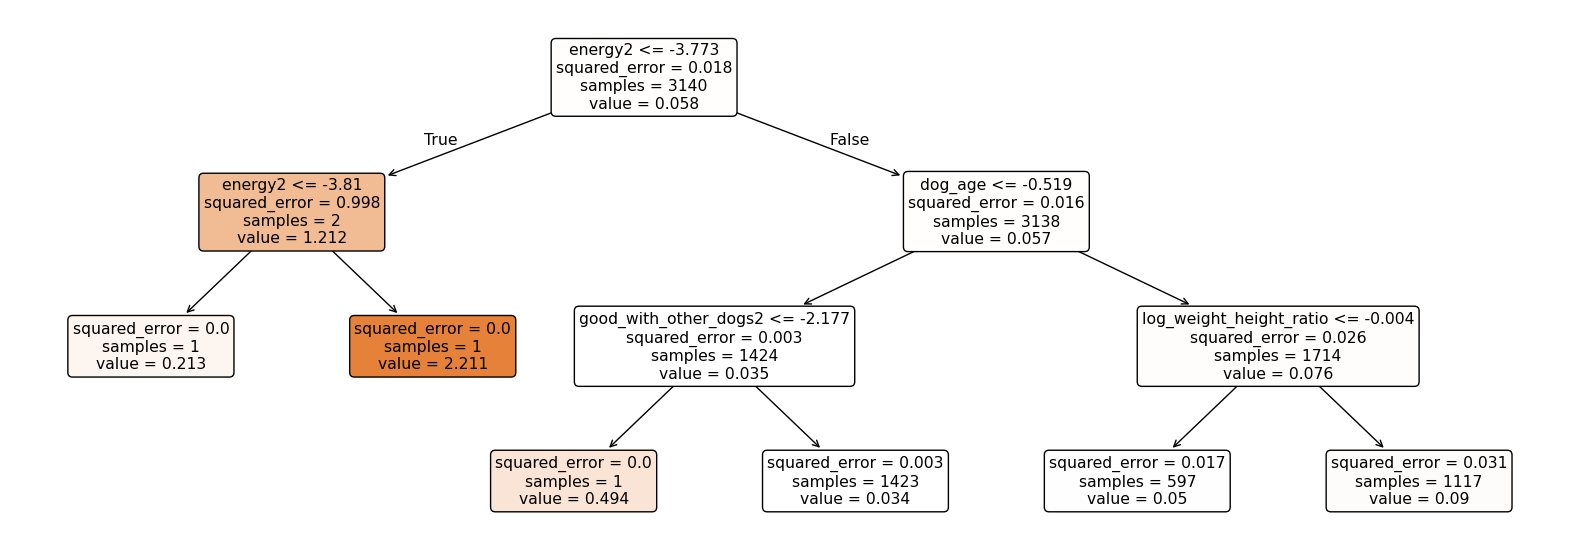

In [92]:
plt.figure(figsize=(20, 7))
plot_tree(best_dt, feature_names=columns_X,filled=True, rounded=True, impurity=True,)
plt.show()

 I cani meno energici, i cani più anziani e più grandi e i cani più giovani e  poco socievoli con gli altri cani tendono a restare più a lungo nel loro rifugio

In [93]:
dt_log = DecisionTreeRegressor(random_state=0)
param_dist_dt_log = {
    'max_depth': np.arange(3, 23)
}


random_search_dt_log = RandomizedSearchCV(
    dt_log, param_distributions=param_dist_dt_log,
    n_iter=20, cv=5, scoring='r2',
    random_state=0, n_jobs=-1, verbose=1
)


random_search_dt_log.fit(X_train_log_multi, y_train_log_multi)


best_params_dt_log = random_search_dt.best_params_
print("Migliori parametri per Decision Tree:", best_params_dt_log)



best_dt_log = DecisionTreeRegressor(**best_params_dt)
best_dt_log.fit(X_train_log_multi, y_train_log_multi)


y_pred_dt_log = best_dt_log.predict(X_test_log_multi)
print('MSE:', round(mean_squared_error(y_test_log_multi, y_pred_dt), 5))
print('MAE:', round(mean_absolute_error(y_test_log_multi, y_pred_dt), 5))
print('R² Score:', round(r2_score(y_test_log_multi, y_pred_dt), 4))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri per Decision Tree: {'max_depth': 3}
MSE: 0.01363
MAE: 0.06297
R² Score: 0.0499


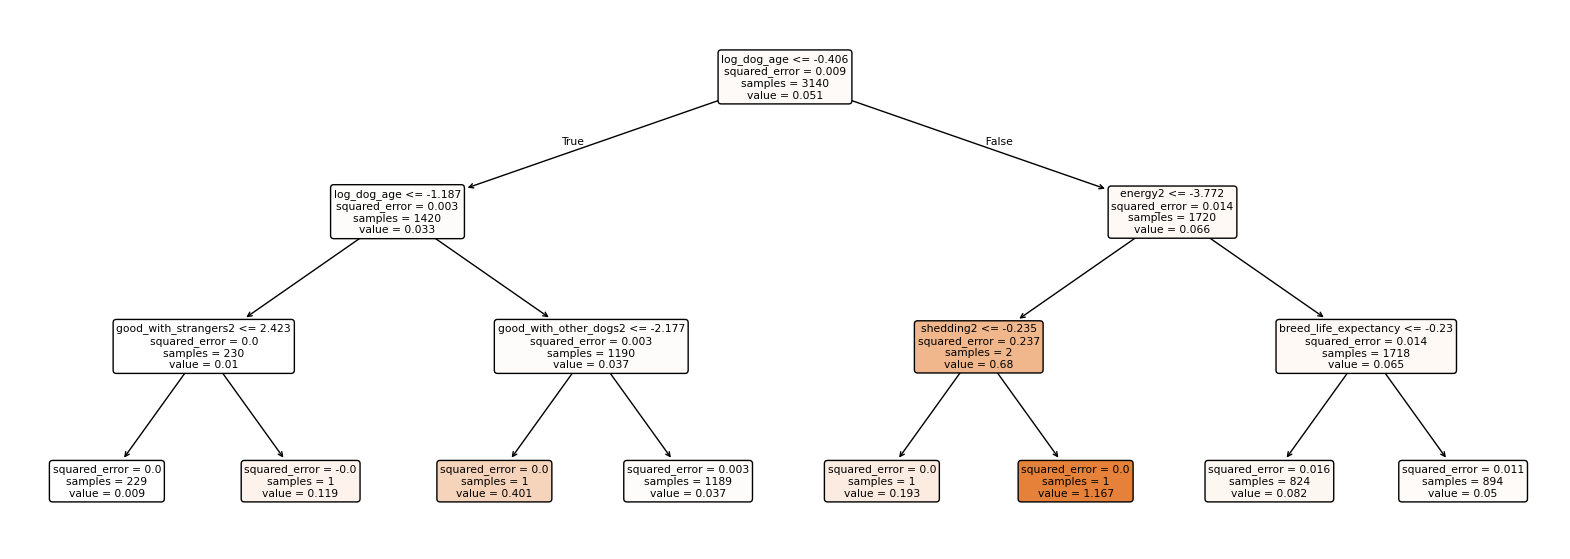

In [94]:
plt.figure(figsize=(20, 7))
plot_tree(best_dt_log, feature_names=features,filled=True, rounded=True, impurity=True,)
plt.show()

Il decision tre regressor con  variabili log-trasformate ha una perfomance migliore del precedente: i cuccioli meno socievoli, i cani più energici, quelli con una maggiore perdita di pelo e un'aspettativa di vita minore tendono ad avere una permanenza più lunga nei rifugi


In [95]:

rf = RandomForestRegressor(random_state=0)

param_dist_rf = {
    'n_estimators': np.arange(50, 300, 50), 
    'max_depth': np.arange(3, 23),  
}


random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf,
    n_iter=20, cv=5, scoring='r2',
    random_state=0, n_jobs=-1, verbose=1
)


random_search_rf.fit(X_train_log_multi, y_train_log_multi)

best_params_rf = random_search_rf.best_params_
print("Migliori parametri per Random Forest:", best_params_rf)


best_rf = RandomForestRegressor(**best_params_rf)
best_rf.fit(X_train_log_multi, y_train_log_multi)


y_pred_rf = best_rf.predict(X_test_log_multi)


print('MSE:', round(mean_squared_error(y_test_log_multi, y_pred_rf), 5))
print('MAE:', round(mean_absolute_error(y_test_log_multi, y_pred_rf), 5))
print('R² Score:', round(r2_score(y_test_log_multi, y_pred_rf), 4))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri per Random Forest: {'n_estimators': 250, 'max_depth': 7}
MSE: 0.01349
MAE: 0.05605
R² Score: 0.0598


In [96]:
best_rf.feature_importances_

array([0.31428119, 0.04297192, 0.03759882, 0.06145423, 0.02982002,
       0.02830215, 0.06681428, 0.05604641, 0.03656117, 0.07064918,
       0.04722257, 0.11550517, 0.06360088, 0.02917199])

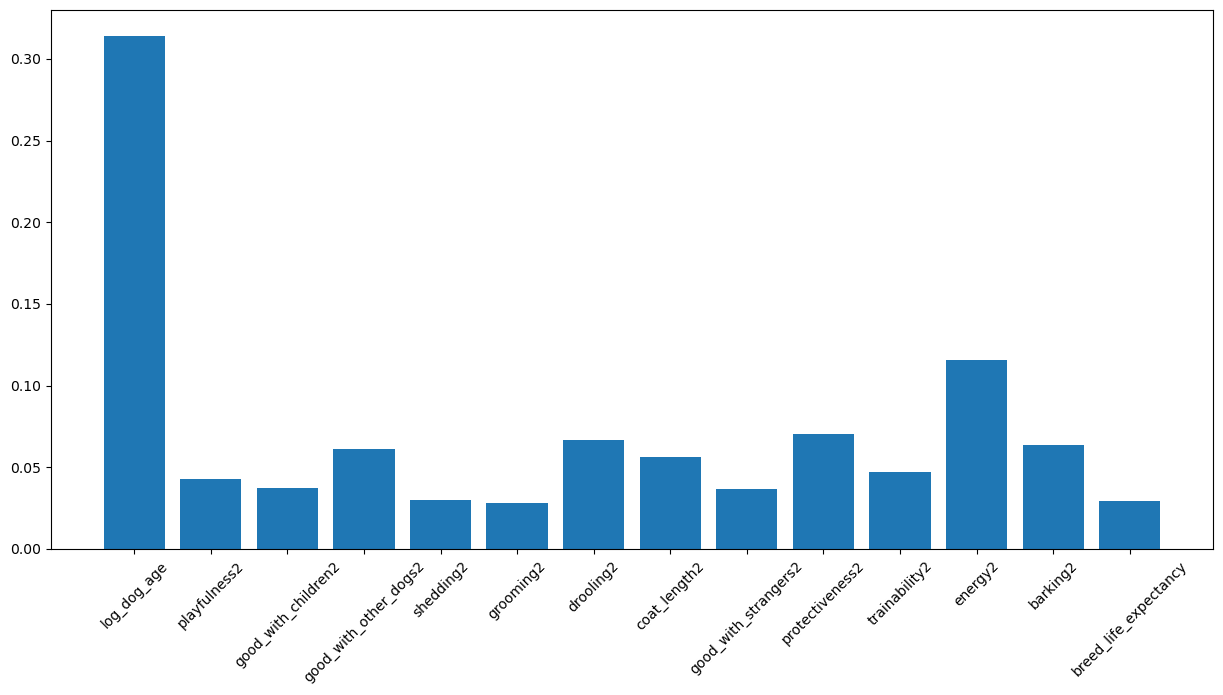

In [97]:
plt.figure(figsize=(15, 7))
plt.bar(features, best_rf.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In [98]:
rf2 = RandomForestRegressor(random_state=0)

param_dist_rf2 = {
    'n_estimators': np.arange(50, 300, 50),  
    'max_depth': np.arange(3, 23),  
}


random_search_rf2 = RandomizedSearchCV(
    rf2, param_distributions=param_dist_rf2,
    n_iter=20, cv=5, scoring='r2',
    random_state=0, n_jobs=-1, verbose=1
)


random_search_rf2.fit(X_train_m, y_train_m)


best_params_rf2= random_search_rf2.best_params_
print('Migliori parametri per Random Forest:', best_params_rf2)


best_rf2 = RandomForestRegressor(**best_params_rf2)
best_rf2.fit(X_train_m, y_train_m)

y_pred_rf2 = best_rf2.predict(X_test_m)


print('MSE (normale):', round(mean_squared_error(y_test_m, y_pred_rf2), 5))
print('MAE (normale):', round(mean_absolute_error(y_test_m, y_pred_rf2), 5))
print('R² Score (normale):', round(r2_score(y_test_m, y_pred_rf2), 4))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri per Random Forest: {'n_estimators': 200, 'max_depth': 5}
MSE (normale): 0.03444
MAE (normale): 0.07151
R² Score (normale): 0.0338


In [99]:
best_rf2.feature_importances_

array([0.26368595, 0.01784862, 0.03185622, 0.04187939, 0.02387926,
       0.02244665, 0.0501064 , 0.04254419, 0.02269078, 0.05381329,
       0.06383313, 0.24111575, 0.06542517, 0.03831242, 0.02056277])

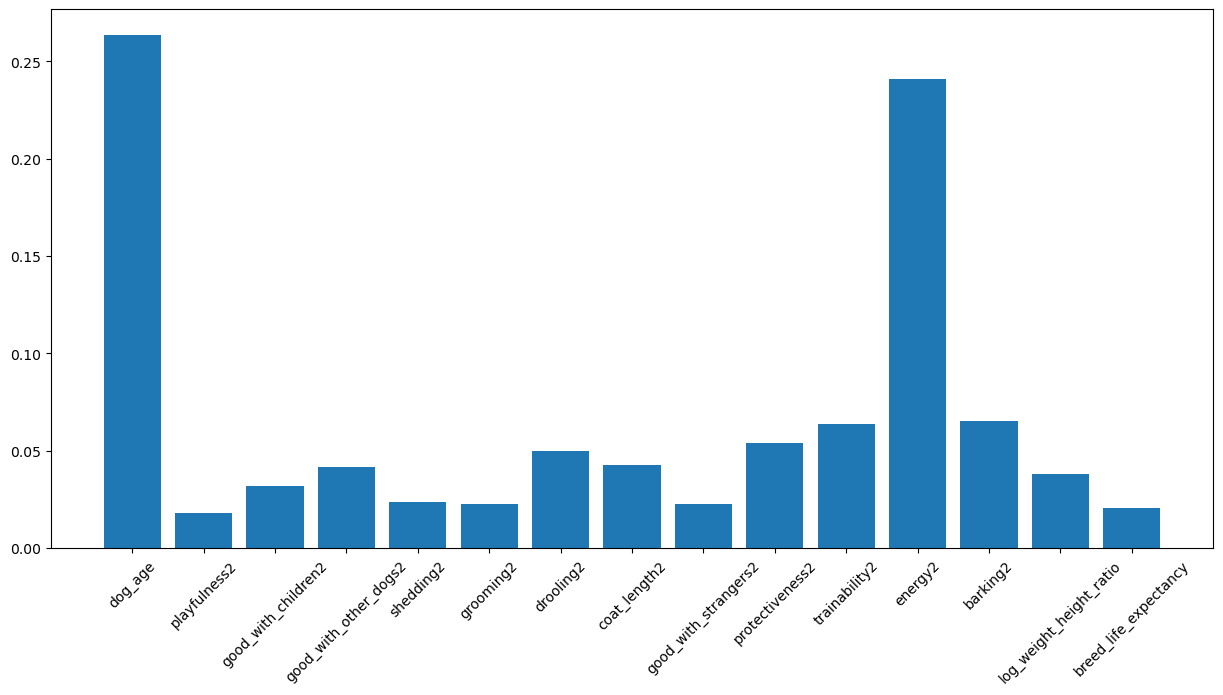

In [100]:
plt.figure(figsize=(15, 7))
plt.bar(columns_X, best_rf2.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In entrambi i modelli le feature più importanti per prevedere la durata della permanenza del cane nel rifiugio sono l'età e l'energia

Il  modello con la miglior performance  è  il random forest con le feature log trasformate(MSE= 0.01349, MAE= 0.05605, R² Score= 0.0598 ) e questo è dovuto alle caratteristiche tecnico-strutturali del modello.

La mancanza di relazione tra i dati potrebbe essere dovuta alla scarsa correlazione tra le variabili presenti nel dataset e alla necessità di un ulteriore lavoro sulle feature partendo anche dei risultati delle migliori del random forest. 

Lavorando ad esempio su log_dog_age crando di fasce di età per il cane  o partendo da energy2 creando una possbile combinazione con altre carettiristiche comportamentali per catturare meglio le differenze tra i dati.